In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('BostonHousing.csv')

In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<AxesSubplot: >

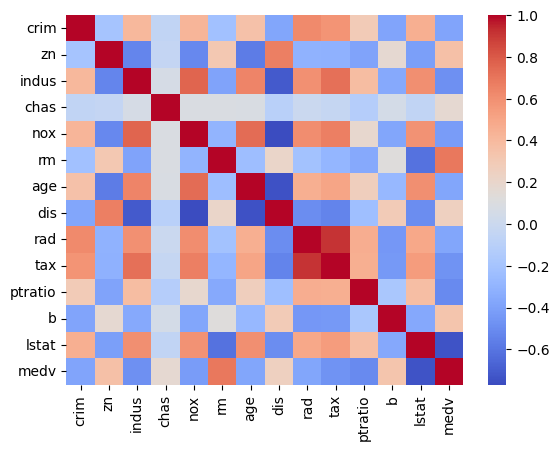

In [5]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')

Text(0.5, 1.0, 'Distribution of MEDV')

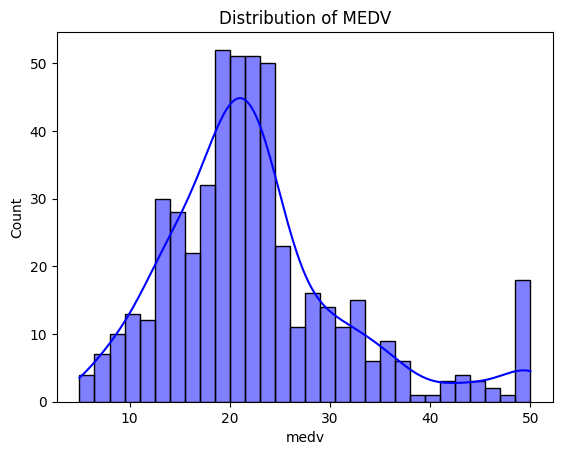

In [6]:
sns.histplot(df['medv'], bins=30, kde=True, color='blue')
plt.title('Distribution of MEDV')

In [7]:
# sns.pairplot(df)

Text(0.5, 1.0, 'RM vs MEDV')

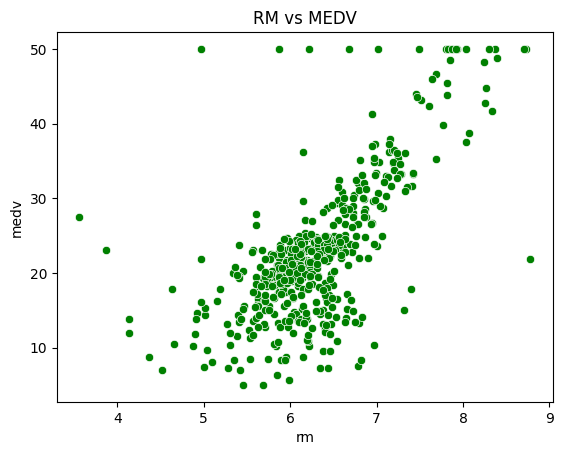

In [8]:
sns.scatterplot(x='rm', y='medv', data=df, color='green')
plt.title('RM vs MEDV')

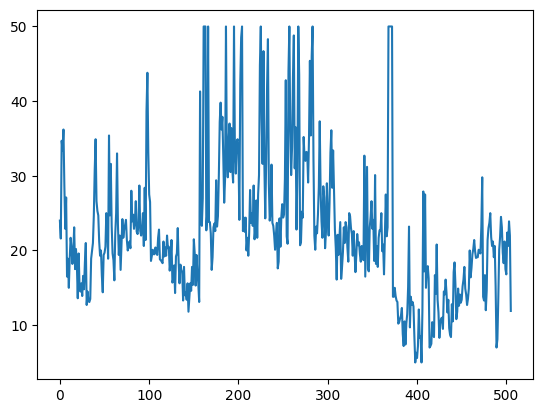

In [9]:
plt.plot(df['medv'])

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
X=df.drop('medv', axis=1)
y=df['medv']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
model=Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [15]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 8ms/step - loss: 608.2957
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 573.8412
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 539.7842
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 499.7654
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 448.6499
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 387.8969
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 317.1202
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 239.2698
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 171.1118
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 111.5654
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 76.6504
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 60.9099
Epoch 13/100
7/7 [=====================

In [16]:
loss=model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 5ms/step - loss: 11.8610
11.860995292663574


In [17]:
predictions=model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


<AxesSubplot: xlabel='medv'>

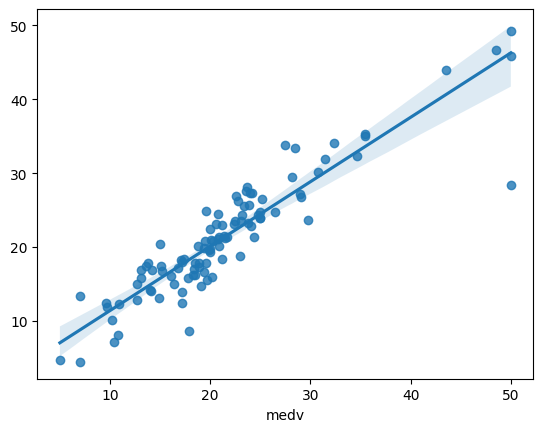

In [18]:
sns.regplot(x=y_test, y=predictions)